In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MVA/ML Times series/Projet/

Mounted at /content/drive
/content/drive/MyDrive/MVA/ML Times series/Projet


In [2]:
!pip install statsmodels

In [15]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import arff
import pandas as pd
import statsmodels

In [5]:
data, meta = arff.loadarff('ECG5000_TEST.arff')
df = pd.DataFrame(data)

df = df[df['target'] == b'1'].copy() #keep only the first class
df.drop('target', axis=1, inplace=True) #drop the class number

In [6]:
print(len(df))

2627


In [7]:
#we check that there are no missing values
if df.isna().any().any():
    print("There are missing values")
else:
    print("No missing values")


No missing values


In [8]:
#we check that there are no values set to 0
for i in range(len(df)):
    line = df.iloc[i].astype(float).tolist()
    for j in range(len(line)):
      if(line[j]==0.0):
        print(i)
        print(line[j])


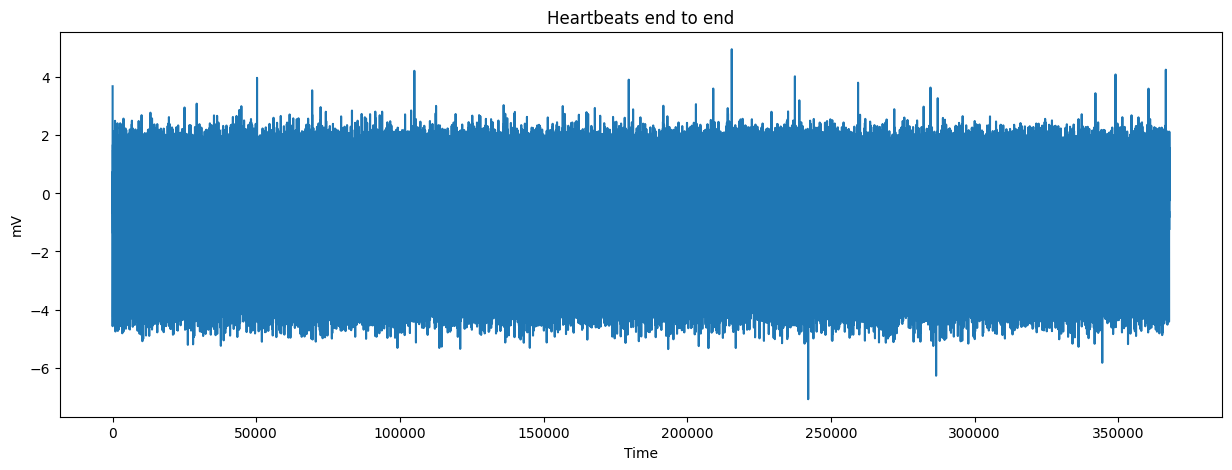

In [19]:
plt.figure(figsize = (15,5))
ecg_end_to_end = []
for i in range(len(df)):
  line = df.iloc[i]
  ecg_end_to_end += line.astype(float).tolist()

plt.ylabel("mV")
plt.xlabel("Time")
plt.title("Heartbeats end to end")
plt.plot([i for i in range(len(ecg_end_to_end))],ecg_end_to_end)
plt.show()

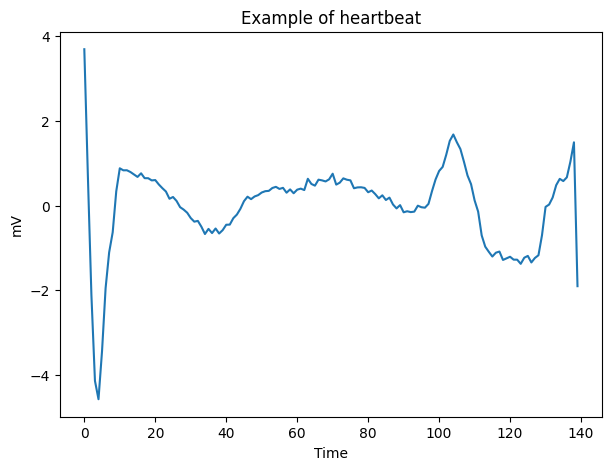

In [10]:
plt.figure(figsize = (7,5))
y = []
for i in range(len([1])):
  line = df.iloc[i]
  y += line.astype(float).tolist()

plt.ylabel("mV")
plt.xlabel("Time")
plt.title("Example of heartbeat")
plt.plot([i for i in range(len(y))],y)
plt.show()

In [11]:
slope, intercept = np.polyfit([i for i in range(len(y))], y, 1)
print("The coefficient of the slope for a linear interpolation is : ",slope)


The coefficient of the slope for a linear interpolation is :  0.00022659132156917542


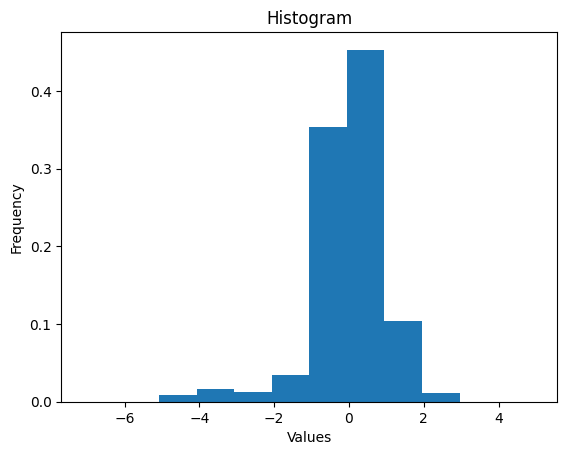

In [20]:
plt.hist(ecg_end_to_end,bins = 12,density = True)
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


We will only study ecg signals remaining between -5 and 3 mV.

In [42]:
## AR outlier removal

n_iter = 2
e = 1
l = 0.01
ecg = ecg_end_to_end.copy()
p = 140

#for i in range(n_iter):
r = statsmodels.tsa.stattools.levinson_durbin(ecg_end_to_end, nlags=p, isacov=False)

coefs =[1] + r[1].tolist()
wrong_indexes = []
predicted_values = []
for i in range(p,len(ecg)):
  predicted_value = np.array(ecg[i-p:i])@np.array(r[1])
  if(np.abs(predicted_value - ecg[i]) > e):
    wrong_indexes.append(i)
    predicted_values.append(predicted_value)
for j in range(len(predicted_values)):
  ecg[wrong_indexes[j]] = predicted_values[j]

In [43]:
w = [0]*2627

for i in range(len(wrong_indexes)):
  w[(wrong_indexes[i])//140]+= 1

for i in range(1,len(w)):
  if(w[i]== 0):
    print("Le signal {} ne présente pas d'anomalie.".format(i))
    break

Le signal 16 ne présente pas d'anomalie.


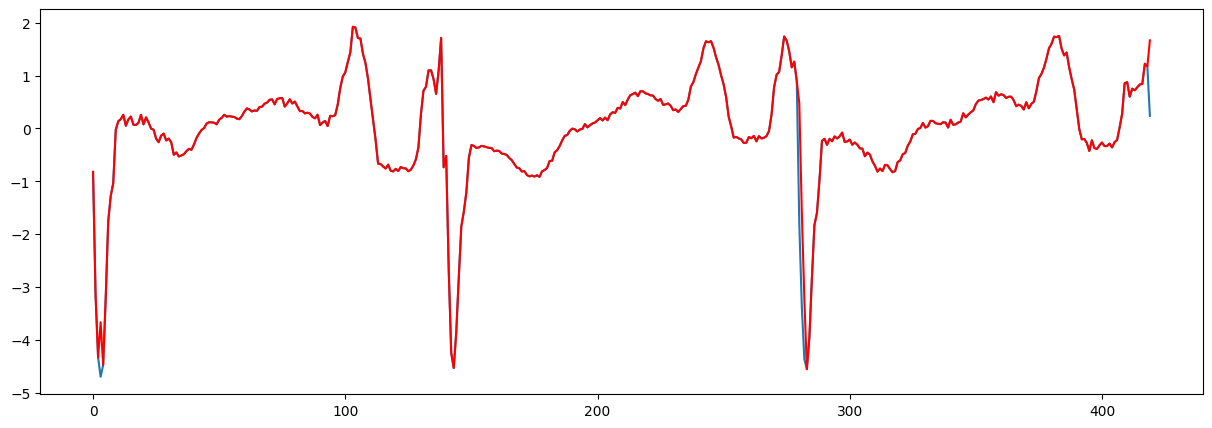

In [44]:
plt.figure(figsize = (15,5))
n1 = 15*140
n2 = 18*140
plt.plot([i for i in range(len(ecg_end_to_end[n1:n2]))],ecg_end_to_end[n1:n2])
plt.plot([i for i in range(len(ecg_end_to_end[n1:n2]))],ecg[n1:n2],color="r")
plt.show()